In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("globalterrorismdb_0718dist.csv", encoding='ISO-8859-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,31,33,61,62,76,79,94,96,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [6]:
data.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
36801,198901070004,1989,1,7,NaN,0,NaN,183,South Africa,11,Sub-Saharan Africa,Gauteng,Sandton,-26.107200,28.058292,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,21,Utilities,107.0,Electricity,Electrical Co.,Substation,...,NaN,NaN,Explosive,0.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,0.0,-9.0,NaN
36802,198901070005,1989,1,7,NaN,0,NaN,159,Peru,3,South America,Unknown,El Boqueron del Padre del Abad,NaN,NaN,5,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,3,Police,25.0,Police Security Forces/Officers,republican guard,unit,...,NaN,NaN,Automatic firearm,5.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
36803,198901070006,1989,1,7,NaN,0,NaN,159,Peru,3,South America,Lima,Lima,-11.967368,-76.978462,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,3,Police,25.0,Police Security Forces/Officers,republican guard,unit,...,NaN,NaN,Automatic firearm,5.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
36804,198901070007,1989,1,7,NaN,0,NaN,159,Peru,3,South America,Apurimac,Chalhuanca district,-14.295196,-73.242300,3,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,3,Police,25.0,Police Security Forces/Officers,republican guard,unit,...,NaN,NaN,Automatic firearm,4.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
36805,198901070008,1989,1,7,NaN,0,NaN,92,India,6,South Asia,Punjab,Baddowal,30.860768,75.744748,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,14,Private Citizens & Property,75.0,Village/City/Town/Suburb,Government,Town of Baddowal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.shape

(36806, 135)

In [8]:
data.size

4968810

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36806 entries, 0 to 36805
Columns: 135 entries, eventid to related
dtypes: float64(57), int64(21), object(57)
memory usage: 37.9+ MB


In [10]:
data.dtypes

eventid         int64
iyear           int64
imonth          int64
iday            int64
approxdate     object
               ...   
INT_LOG       float64
INT_IDEO      float64
INT_MISC      float64
INT_ANY       float64
related        object
Length: 135, dtype: object

In [11]:
data.isnull().sum()

eventid           0
iyear             0
imonth            0
iday              0
approxdate    36782
              ...  
INT_LOG           1
INT_IDEO          1
INT_MISC          1
INT_ANY           1
related       33549
Length: 135, dtype: int64

In [12]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [13]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,gsubname3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,3.680600e+04,36806.000000,36806.00000,36806.000000,36806.000000,36806.000000,36806.000000,34780.000000,3.478000e+04,36806.000000,36806.000000,36806.000000,36806.000000,36806.000000,36806.000000,6195.000000,36806.000000,36806.000000,36806.000000,36806.000000,39.000000,2.000000,36806.00000,35033.000000,36606.000000,402.000000,303.000000,364.000000,65.000000,47.000000,64.000000,0.0,36806.000000,100.000000,11.000000,36806.000000,5985.000000,1148.000000,1152.000000,296.000000,19.000000,18.000000,8.0,8.000000,42.000000,36806.000000,30604.000000,2417.000000,2018.000000,348.000000,303.000000,66.000000,62.000000,31156.000000,2327.000000,2504.000000,29342.000000,2284.00000,2235.000000,36805.000000,14775.000000,7.722000e+03,36634.000000,2482.000000,2482.000000,738.000000,510.000000,36471.000000,5.240000e+02,1.0,1.160000e+02,2.0,938.000000,715.000000,36805.000000,36805.000000,36805.000000,36805.000000
mean,1.982114e+11,1982.048552,6.38328,15.264875,0.016247,156.611531,5.147911,18.004364,-2.507041e+03,1.403249,0.023746,0.992393,0.993045,0.849861,-1.239282,1.144310,0.088518,0.919714,0.000897,3.075341,4.692308,3.000000,7.52793,44.016185,129.758947,8.992537,47.660066,176.082418,6.384615,41.085106,135.765625,NaN,0.052193,0.200000,0.090909,0.001467,5.157895,-74.373693,-0.042535,4.591216,0.947368,5.611111,1.0,8.000000,0.214286,6.545726,10.329499,6.407116,9.736373,6.566092,9.693069,6.287879,10.467742,2.163115,0.347228,0.572284,1.755402,0.69352,0.064877,0.711805,3.445076,2.367743e+05,0.067751,1.343674,0.077357,22.172087,36.649020,0.014560,3.378601e+06,20000.0,1.069592e+06,0.0,2.962687,9.711888,-3.134004,-3.089118,0.161011,-2.373645
std,4.520394e+08,4.520587,3.39337,8.848823,0.126427,144.464407,3.178581,25.571636,4.621376e+05,1.093297,0.152259,0.086890,0.083110,0.357212,3.361560,0.441068,0.284051,0.271739,0.029930,1.906781,2.483142,1.414214,6.68873,32.642585,74.054322,6.831601,29.520225,124.567633,5.917908,28.355530,74.086124,NaN,0.222418,0.402015,0.301511,0.038276,76.829743,43.393545,1.710832,3.148062,0.229416,3.821593,0.0,2.828427,0.415300,2.371115,7.140615,1.840876,7.083528,2.144277,7.777207,1.516729,7.787585,9.209018,6.440062,2.953827,11.041114,15.97262,0.363752,0.665091,0.522357,6.485652e+06,0.251322,434.574992,4.193580,145.881673,173.676552,0.119783,4.407848e+07,NaN,4.259471e+06,0.0,1.364160,34.650650,4.368143,4.423656,0.769660,4.311093
min,1.970000e+11,1970.000000,0.00000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.00000,1.000000,4.000000,1.000000,1.000000,11.000000,1.000000,7.000000,6.000000,NaN,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,0.000000,1.000000,1.0,1.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-9.000000,2.000000,-9.900000e+01,0.000000,-99.000000,-99.000000,-99.000000,-99.000000,0.000000,0.000000e+00,20000.0,0.000000e+00,0.0,2.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.979090e+11,1979.000000,3.00000,8.000000,0.000000,61.000000,2.000000,4.667128,-7.701538e+01,1.000000,0.000000,1.000000,1.000000,1.000000,0.0000

In [14]:
data.corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,gsubname3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999954,-0.000316,0.007181,-0.042072,-0.264930,-0.075430,-0.375815,-0.000101,0.124994,0.058991,-0.000039,0.029834,-0.078046,0.030222,-0.229761,0.120725,0.045584,0.018874,-0.063767,0.073566,1.0,0.088361,0.090549,-0.228398,-0.090739,-0.112420,-0.071549,-0.217700,-0.247400,-0.167163,NaN,0.038659,-0.348026,-0.615382,-0.022526,0.351630,0.346162,-0.043187,0.065814,0.542170,0.689273,NaN,1.0,-0.418072,-0.036346,-0.105201,-0.007219,-0.038828,0.052100,0.204097,0.042032,0.045206,0.063728,0.025391,0.089704,0.031637,0.013504,0.065580,0.151313,0.019785,-0.001160,-0.058321,0.011139,-0.032776,0.103686,0.050246,-0.085634,-0.006571,NaN,-0.164288,NaN,0.092887,0.025178,0.073817,0.071409,-0.163582,-0.012508
iyear,0.999954,1.000000,-0.007873,0.006937,-0.042027,-0.264946,-0.075188,-0.375419,-0.000034,0.125129,0.059036,-0.000374,0.029826,-0.078049,0.030273,-0.229746,0.120964,0.045551,0.018755,-0.063542,0.073430,1.0,0.088395,0.090534,-0.228283,-0.090853,-0.112570,-0.071741,-0.219226,-0.248941,-0.165528,NaN,0.038770,-0.347378,-0.617065,-0.022552,0.351481,0.347456,-0.042207,0.070552,0.539178,0.687489,NaN,1.0,-0.369253,-0.036061,-0.105154,-0.007066,-0.038713,0.051622,0.205226,0.043510,0.046262,0.063684,0.025128,0.089468,0.031493,0.013360,0.065382,0.151193,0.019944,-0.001220,-0.058282,0.010931,-0.032854,0.103519,0.050015,-0.085587,-0.006279,NaN,-0.165604,NaN,0.092243,0.025018,0.073826,0.071411,-0.163729,-0.012496
imonth,-0.000316,-0.007873,1.000000,0.012627,0.000051,0.004088,-0.027486,-0.043827,-0.008879,-0.020013,-0.007099,-0.001169,0.001360,0.002712,-0.005098,-0.003295,-0.033987,0.005439,0.015610,-0.029830,0.022224,NaN,-0.007133,-0.000557,-0.010002,0.018344,0.025504,0.031203,0.203290,0.211080,-0.124560,NaN,-0.012934,0.004315,0.218543,0.003201,0.030110,0.027631,-0.089780,0.041053,0.446009,0.010644,NaN,-1.0,0.181503,-0.037603,-0.010690,-0.017174,-0.009600,0.031114,-0.115934,-0.119288,-0.081679,0.004950,0.047021,0.034279,0.018663,0.024959,0.027446,0.009643,-0.020525,0.007889,-0.002742,0.024891,0.011395,0.017071,-0.018532,-0.006100,-0.035891,NaN,0.153727,NaN,0.056170,0.009166,-0.006278,-0.005125,0.020316,-0.006969
iday,0.007181,0.006937,0.012627,1.000000,-0.005547,0.015720,0.013217,-0.001279,-0.005276,-0.021879,-0.005435,0.009618,-0.003923,0.007390,-0.003189,-0.008155,-0.004691,0.004991,-0.002128,-0.032558,-0.157117,-1.0,-0.014817,-0.017187,0.007209,-0.186120,-0.153652,-0.173293,-0.021071,-0.196056,-0.117219,NaN,0.008134,-0.341087,-0.518541,-0.003554,-0.020278,-0.028138,-0.007789,0.079335,0.235831,0.636483,NaN,1.0,-0.295495,-0.016661,0.018688,0.034456,0.009025,0.070910,-0.039136,-0.038220,-0.009722,-0.004852,0.023141,0.032467,-0.000766,0.009541,0.028370,0.009921,0.011256,0.016374,-0.009571,-0.034375,-0.000641,-0.052233,0.002504,-0.007283,0.002956,NaN,0.012880,NaN,0.026178,-0.034314,-0.004854,-0.005117,0.011338,0.003058
extended,-0.042072,-0.042027,0.000051,-0.005547,1.000000,-0.045836,0.001051,-0.021791,0.000672,0.015697,-0.004517,-0.003588,0.010755,0.038975,-0.040399,0.007917,-0.026430,0.036388,-0.003850,0.161165,0.171466,NaN,-0.026787,-0.019993,-0.004732,0.002757,0.074488,-0.051145,0.142031,0.110517,-0.251305,NaN,-0.012765,NaN,NaN,0.006303,0.025109,0.112144,0.045908,0.179019,NaN,NaN,NaN,NaN,-0.233550,0.20

In [15]:
data['country_txt'].value_counts()

El Salvador       4215
Peru              3621
Colombia          2890
United Kingdom    2798
Spain             2101
                  ... 
Ghana                1
Albania              1
Vatican City         1
Soviet Union         1
New Hebrides         1
Name: country_txt, Length: 142, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


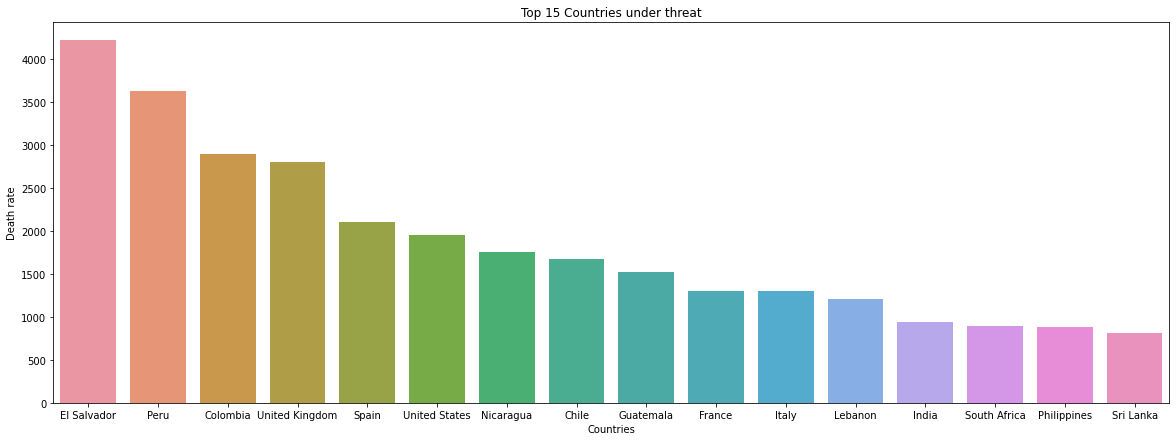

In [16]:
plt.figure(figsize=(20,7))
c = data['country_txt'].value_counts().index
sns.countplot(data['country_txt'], order=c[:16]);
plt.xlabel('Countries')
plt.ylabel('Death rate')
plt.title('Top 15 Countries under threat')
plt.show()

In [17]:
data['attacktype1_txt'].value_counts()

Bombing/Explosion                      16674
Armed Assault                           8021
Assassination                           6207
Facility/Infrastructure Attack          2419
Hostage Taking (Kidnapping)             1527
Unknown                                 1253
Hostage Taking (Barricade Incident)      484
Hijacking                                160
Unarmed Assault                           61
Name: attacktype1_txt, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


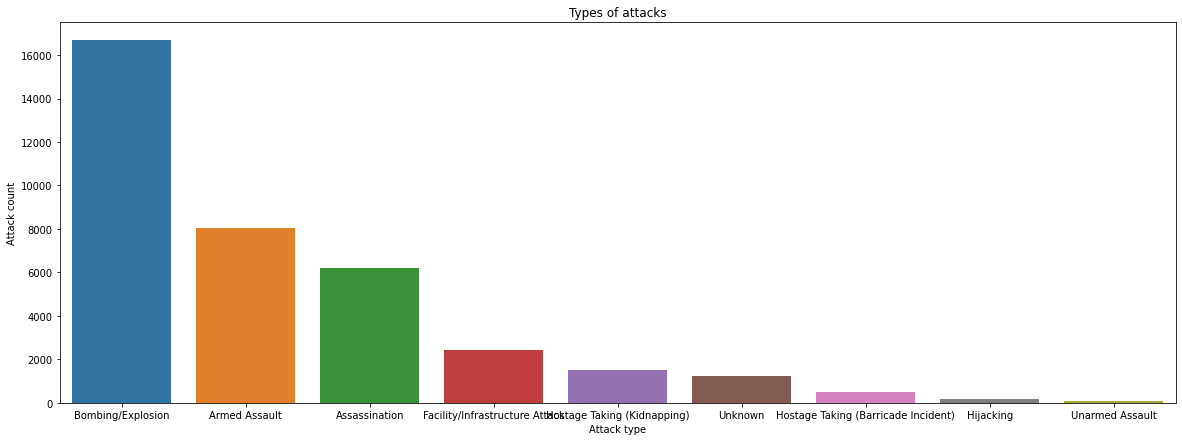

In [18]:
plt.figure(figsize=(20,7))
attack = data['attacktype1_txt'].value_counts().index
sns.countplot(data['attacktype1_txt'], order=attack[:]);
plt.xlabel('Attack type')
plt.ylabel('Attack count')
plt.title('Types of attacks')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


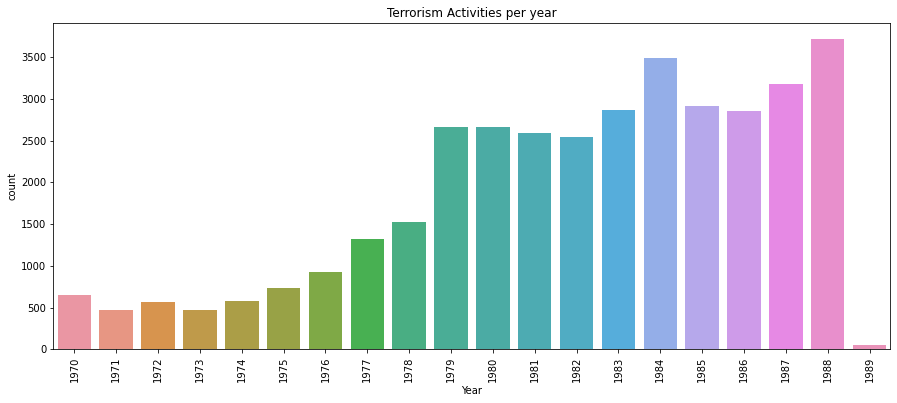

In [19]:
plt.subplots(figsize=(15,6))
sns.countplot('iyear', data=data)
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.title('Terrorism Activities per year')
plt.show()

In [20]:
data['region_txt'].value_counts()

South America                  9346
Western Europe                 9019
Central America & Caribbean    7910
Middle East & North Africa     3511
North America                  2111
South Asia                     2009
Sub-Saharan Africa             1532
Southeast Asia                 1080
East Asia                       170
Australasia & Oceania            65
Eastern Europe                   53
Name: region_txt, dtype: int64

In [24]:
group_attack = data['gname'].value_counts()
group_attack

Unknown                                             11088
Shining Path (SL)                                    2748
Farabundo Marti National Liberation Front (FMLN)     2337
Irish Republican Army (IRA)                          1841
Basque Fatherland and Freedom (ETA)                  1271
                                                    ...  
La Paz peasants federation                              1
Imperial Iranian Patriotic Organization                 1
The Great Serpent                                       1
Prolitarian Internationalism                            1
Spanish International Communist Party                   1
Name: gname, Length: 1352, dtype: int64

Closer analysis of El Salvador

In [26]:
ES_attacks = data[data.country_txt=='El Salvador'].reset_index()

In [27]:
ES_attacks.head()

,index,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1615,197211050001,1972,11,5,NaN,0,NaN,61,El Salvador,2,Central America & Caribbean,San Salvador,San Salvador,13.692880,-89.199161,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,6,Airports & Aircraft,NaN,NaN,NaN,...,NaN,NaN,Explosive,0.0,NaN,NaN,0.0,NaN,NaN,1.0,3.0,Minor (likely < $1 million),5000.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
1,1624,197211150001,1972,11,15,NaN,0,NaN,61,El Salvador,2,Central America & Caribbean,San Salvador,San Salvador,13.692880,-89.199161,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,Argentina Pavilion,...,NaN,NaN,Explosive,0.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
2,1856,197304290001,1973,4,29,NaN,0,NaN,61,El Salvador,2,Central America & Caribbean,San Salvador,San Salvador,13.692880,-89.199161,1,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,1,Business,4.0,Multinational Corporation,IBM office,...,NaN,NaN,Explosive,0.0,NaN,NaN,0.0,NaN,NaN,1.0,4.0,Unknown,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,2211,197402000001,1974,2,0,NaN,0,NaN,61,El Salvador,2,Central America & Caribbean,Santa Ana,Chalchuapa,13.986667,-89.681111,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,3,Police,22.0,"Police Building (headquarters, station, school)",NaN,...,NaN,NaN,Chlorate bomb,0.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,0.0,-9.0,NaN
4,2265,197403060001,1974,3,6,NaN,0,NaN,61,El Salvador,2,Central America & Caribbean,San Salvador,San Salvador,13.692880,-89.199161,1,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,2,Government (General),21.0,Government Building/Facility/Office,NaN,...,NaN,NaN,Pistols,NaN,NaN,NaN,3.0,NaN,NaN,1.0,3.0,Minor (likely < $1 million),2000.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,0.0,-9.0,NaN


In [32]:
print(f"""{ES_attacks.city.nunique()} cities were attacked by {ES_attacks.gname.nunique()} terrorist groups between the year {ES_attacks.iyear.min()} and {ES_attacks.iyear.max()}.
 The total number of terrorist attacks in El Salvador is {ES_attacks.index.nunique()}""")

519 cities were attacked by 41 terrorist groups between the year 1972 and 1989.
 The total number of terrorist attacks in El Salvador is 4215
